# import and load data

In [7]:
from my_imports import *
import stanTools
from sklearn import mixture
from collections import Counter
import copy
from copy import deepcopy

# to use  my own stylimport matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import ticker
from scipy.stats import pearsonr, spearmanr

mpl.rcParams.update(mpl.rcParamsDefault)

avb_cols = {'pur':'#5B49B6', 
            'blu':'#52A4D9', 
            'tur':'#59C09D',
            'tea':'#B3EBAD',
            'yel': '#C3D64C',
            'gra':'#9B9B9D'}
avb_contrast_cols = {
    'p': '#C17EFF',
    'g': '#75C26A'
}
plt.style.use('/Users/davidding/PycharmProjects/pareSingleLibrary2/codebase/src/paper_style1.mplstyle')



import plotMutationMatrixCodon as pmmc
from constants import (
    CODON_TABLE,
    AA_LIST_ALPHABETICAL,
    CODON_LIST_AA_CHEMISTRY,
    WT_PARD_DNA,
    WT_PARE_DNA,
    WT_PARE_DNA_AA,
    WT_PARD_DNA_AA,
)


In [2]:
plot_out= '/Users/davidding/PycharmProjects/pareSingleLibrary2/codebase/pairedEnd/x51/2009_out/processing/'

bayes_pin_raw = '/Users/davidding/Dropbox (HMS)/parESingleLibrary/ex51_set_up_additional_mutants/illumina/data/bayes_o2_2009/raw/'
bayes_pin_log2 = '/Users/davidding/Dropbox (HMS)/parESingleLibrary/ex51_set_up_additional_mutants/illumina/data/bayes_o2_2009/log2/'


# of nontoxic mutants in all concentrations 839
# of toxin mutants called toxic: 311
# of nontoxic mutants in all concentrations 855
# of toxin mutants called toxic: 781
len of mt_toxins: 310
len of ta_toxins 781
15
15
30
37


2012_load_data.py:636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_muts_mt_wt_toxin['t_pos_pdb'] = df_muts_mt_wt_toxin.t_mut.str[1:-1].astype(int) +1
2012_load_data.py:737: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_curr['at_mut'] = [at] * len(df_curr)


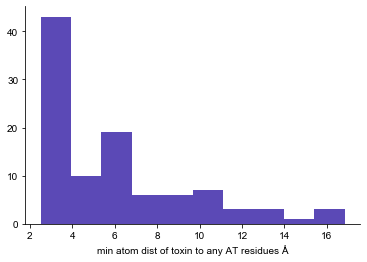

In [3]:
%run -i 2012_load_data.py

In [4]:
%run -i 2103_read_ec_files.py

added so many missing rows to df_longrange 736
added so many missing rows to df_longrange 729
added so many missing rows to df_longrange 744
added so many missing rows to df_longrange 752
added so many missing rows to df_longrange 752
added so many missing rows to df_longrange 744
added so many missing rows to df_longrange 806
added so many missing rows to df_longrange 744
added so many missing rows to df_longrange 751
added so many missing rows to df_longrange 810
1389.0


/Users/davidding/PycharmProjects/pareSingleLibrary2/codebase/src/natureTools.py:1466: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top['tp_inter'] = tp_inter
/Users/davidding/PycharmProjects/pareSingleLibrary2/codebase/src/natureTools.py:1467: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top['tp_mono1'] = tp_mono1
/Users/davidding/PycharmProjects/pareSingleLibrary2/codebase/src/natureTools.py:1468: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

1390.0
1197.0
1189.0
1140.0
1047.0
915.0
1410.0
1198.0
1410.0
1198.0
added so many missing rows to df_longrange 806
915.0


# suppl codon heatmaps


In [9]:
# load the raw codon level count data
count_dir_ex47='./df/tc/ex47/'
count_dir_ex51='./df/tc/ex51/'
conc_to_fs = {
    1.2e-4 : (count_dir_ex47 + '178_mcsAT_tc.csv', count_dir_ex47+'179_mcsAT_tc.csv'),
    8e-4 : (count_dir_ex47 + '180_mcsAT_tc.csv', count_dir_ex47+ '181_mcsAT_tc.csv'),
    5.3e-3: (count_dir_ex47 + '182_mcsAT_tc.csv', count_dir_ex47+ '183_mcsAT_tc.csv'),
    0.2: (count_dir_ex47 + '184_mcsAT_tc.csv', count_dir_ex47+ '185_mcsAT_tc.csv'),
    2e-5: (count_dir_ex51 + '190_m_tc.csv', count_dir_ex51 + '191_m_tc.csv'),
    4e-5: (count_dir_ex51 + '188_m_tc.csv', count_dir_ex51 + '189_m_tc.csv'),
    8e-5: (count_dir_ex51 + '186_m_tc.csv', count_dir_ex51 + '187_m_tc.csv')
}




conc_to_df = {}
pseudocount=1



def add_codon_nums(df_m):
    df_m['codon_mut'] = df_m.codonkey.str[-3:]
    df_m['aa_pos'] = df_m.mutkey.str[1:-1]
    df_m['codon_pos'] = df_m.codonkey.str[3:-3]
    return df_m

for c, (f1, f2) in conc_to_fs.items():
    data_all, data_r1, data_r2, aa_dic, df_m, df_syn = stanTools.get_stan_data(f1, f2)
    #print(df_syn.head())
    
    print(df_m.shape)
    df_m = pd.concat([df_m, df_syn])
    print(df_m.shape)
    # add lrrs
    df_m = df_m.rename(columns={
        'raw_count_r1'     : 'c_pre_m1',
        'raw_count_post_r1': 'c_aft_m1',
        'raw_count_r2'     : 'c_pre_m2',
        'raw_count_post_r2': 'c_aft_m2'
    })
    # with pseudocount =1
    df_m = stanTools.add_ratios_lrr_df_m(df_m, pseudocount=pseudocount)
    
    
    # add codon level data mutcodon
    
    df_m = add_codon_nums(df_m)
    
    conc_to_df[c] = df_m

/Users/davidding/PycharmProjects/pareSingleLibrary2/codebase/src/stanTools.py:1003: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rep1['raw_count_post_r1'] = df_rep1['raw_count_post_r1'].fillna(0)
/Users/davidding/PycharmProjects/pareSingleLibrary2/codebase/src/stanTools.py:1004: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rep2['raw_count_post_r2'] = df_rep2['raw_count_post_r2'].fillna(0)
/Users/davidding/PycharmProjects/pareSingleLibrary2/codebase/src/stanTools.py:403: SettingWithCopyWarning: 
A va

(6145, 7)
(6424, 7)
(6144, 7)
(6423, 7)
(6144, 7)
(6423, 7)
(6144, 7)
(6423, 7)
(6133, 7)
(6412, 7)
(6141, 7)
(6420, 7)
(6137, 7)
(6416, 7)


In [8]:


importlib.reload(pmmc)
CODON_LIST = []
CODON_LIST_NNS = []

baseList = ["A", "T", "C", "G"]
sList = ["C", "G"]

for b in baseList:
    currCodon = b
    for b2 in baseList:
        currCodon2 = currCodon + b2
        for b3 in baseList:
            currCodon3 = currCodon2 + b3
            CODON_LIST.append(currCodon3)
            if b3 in sList:
                CODON_LIST_NNS.append(currCodon3)

# determines by which base the codons are sorted
CODON_LIST_ALPHABETICAL = sorted(CODON_LIST, key=lambda n: CODON_TABLE[n])  # is a list

# hacky version of overriding
CODON_LIST_ALPHABETICAL = [i for (i, v) in CODON_LIST_AA_CHEMISTRY]

CODON_LIST_NNS_ALPHABETICAL = sorted(CODON_LIST_NNS, key=lambda n: CODON_TABLE[n])



In [10]:
def convert_df_m_to_dpd(df_m, fit_col = 'lrr1'):
    # converting a df_m to a datapoints dict of dict, with keys amino acid position, and nested dict having a 
    dpd = {}
    for aa_pos in set(df_m.aa_pos):
        dpd[int(aa_pos)] = {}
        df_pos = df_m.loc[df_m.aa_pos == aa_pos]
        for codon_mut in df_pos.codon_mut:
            dpd[int(aa_pos)][codon_mut] = df_pos.loc[df_pos.codon_mut == codon_mut][fit_col].values[0]
    return dpd

def plot_codons(df_m, fout = plot_out + 'new_mcs_data', var_plot = 'lrr1', plot_number_ticks = False):
        
    codon_list = CODON_LIST_ALPHABETICAL
    dpd = convert_df_m_to_dpd(df_m, fit_col = var_plot)
    print(dpd.keys())
    if 0 not in dpd:
        dpd[0] = {}
    mutation_matrix = np.zeros((len(dpd), len(codon_list)))

    transformation = lambda x: x
    for i, column in enumerate(sorted(dpd.keys())):
        # print('i, column', i, column
        # for j, res_to in enumerate(aa_list):
        for j, res_to in enumerate(codon_list):
            if column in dpd and res_to in dpd[column]:
                mutation_matrix[i, j] = transformation(dpd[column][res_to])

            else:
                mutation_matrix[i, j] = float("nan")
    # normalize to  stop
    #mutation_matrix -= syn_mean

    # make the std synonymous
    df_stds = df_m.groupby('mutkey').std()
    df_stds['aa_pos'] = df_stds.index.str[1:-1]
    df_mean_stds =df_stds.groupby('aa_pos').mean()
    # sort the index
    df_mean_stds.index = df_mean_stds.index.astype(int)
    df_mean_stds= df_mean_stds.sort_index()

    # actual plotting
    fig = plt.figure( figsize=(8,6))
    spec = gridspec.GridSpec(ncols=1, nrows=2,
                             height_ratios=[1,3])

    plt.subplots_adjust(hspace=0.05)

    #plot the synonymous standard deviation
    ax0 = fig.add_subplot(spec[0])#, sharex = ax1)
    ax0.plot(np.array(df_mean_stds.index) +0.5, df_mean_stds[var_plot], color='black')
    #ax0.set_ylabel('std syn mutants')
    ax0.set_ylim([0,1.3])
    ax0.set_xticks(np.array((range(103)))+0.5)
    ax0.set_yticklabels([0,0.5,1],size=8)


    plt.setp(ax0.get_xticklabels(), visible=False)

    #plot the heatmap
    ax1 = fig.add_subplot(spec[1], sharex=ax0)

    min_val = np.ma.masked_where(np.isnan(mutation_matrix), mutation_matrix).min()
    ax1.pcolormesh(mutation_matrix.T,cmap = plt.cm.bwr, vmin=min_val, vmax = -min_val)


    ax1.set_yticks(np.array((range(64)))+0.5)
    ytick_labels = CODON_LIST_ALPHABETICAL
    ax1.set_yticklabels(ytick_labels, size=4)
    
    if plot_number_ticks:
        ax1.set_xticks(np.array(range(11))*10+0.5)
        ax1.set_xticklabels([0,10,20,30,40,50,60,70,80,90,100], size=8)
    else:
        ax1.set_xticks(np.array((range(103)))+0.5)
        ax1.set_xticklabels(list(WT_PARE_DNA_AA), size=6)

    plt.savefig(fout + '.svg', format='svg')

    plt.show()

In [11]:
# chose to plot the 8e-5% arabinose toxin induction level as it has the closest dynamic range to the previous experiment.
c=8e-5
df_m = conc_to_df[c]

df_m['lrr_norm'] = df_m['lrr1'] - np.mean(df_m.loc[df_m.mutkey.str[-1]=='_'].lrr1)
df_m['mut_aa'] = df_m.mutkey.str[-1]
df_m['wt_aa'] = df_m.mutkey.str[0]
# need to add 1 to get
df_m['aa_pos'] = df_m.aa_pos.astype(int) 

In [12]:
df_syn = df_m.loc[df_m.mut_aa == df_m.wt_aa]
syn_mean = np.mean(df_syn.lrr1)

df_stop = df_m.loc[df_m.mut_aa == '_']
stop_mean = np.mean(df_stop.lrr1)
print(syn_mean, stop_mean)

-1.8315238727689247 1.0011150096553496


In [13]:
# add a row for M0
df_m_new = deepcopy(df_m)
cols_keep = ['aa_pos', 'lrr1', 'mut_aa', 'wt_aa', 'mutkey', 'codon_mut']
df_m_new = df_m_new[cols_keep]
new_r = dict(zip(cols_keep,[0,np.nan, 'M', 'M', 'M0M', 'ATG'] ))
df_m_new = df_m_new.append(new_r, ignore_index=True)

# codon level heatmap of toxin library without antitoxin in presence of BCD genetic design

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102])


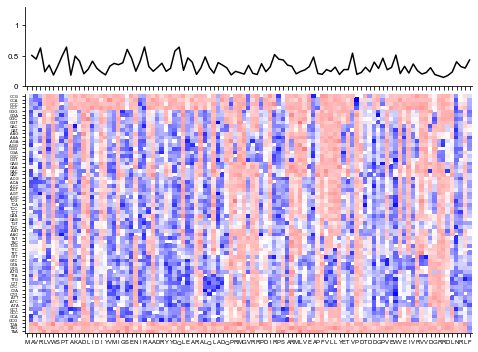

In [80]:
# convert a df to dpd and then to a mutation_matrix

plot_codons(df_m_new, plot_out + 'new_mcs_data_text')

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102])


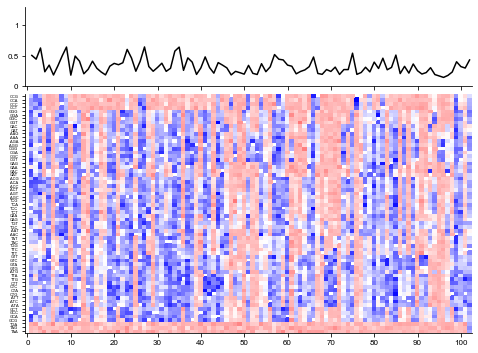

In [81]:
# plot it with numbered ticks
plot_codons(df_m_new, plot_out + 'new_mcs_data_number_ticks', plot_number_ticks=True)

# plotting correlation of mean fitness and synonymous codon variance

SpearmanrResult(correlation=-0.8555280999259263, pvalue=2.3967354196152345e-30)


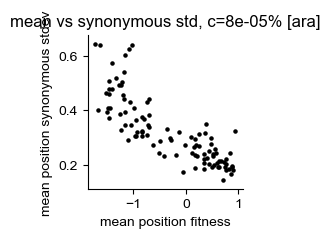

In [14]:
#plot the scatterplot of syn codon variance vs. mean position log read ratio
var_plot = 'lrr1'
df_m = conc_to_df[c]
df_stds = df_m.groupby('mutkey').std()
df_stds['aa_pos'] = df_stds.index.str[1:-1]
df_mean_stds =df_stds.groupby('aa_pos').mean()
# sort the index
df_mean_stds.index = df_mean_stds.index.astype(int)
df_mean_stds= df_mean_stds.sort_index()


# plot mean vs. var
df_means_codon = df_m.groupby('mutkey').mean()
df_means_codon['aa_pos'] = df_means_codon.index.str[1:-1]
df_mean_pos =df_means_codon.groupby('aa_pos').mean()
df_mean_pos.index = df_mean_pos.index.astype(int)
df_merge = df_mean_stds.merge(df_mean_pos, right_index=True, left_index=True, suffixes=('_std','_mean'))
plt.figure(figsize=(2,2))
plt.scatter(df_merge.lrr1_mean, df_merge.lrr1_std, color='black', s=5)
plt.xlabel('mean position fitness')
plt.ylabel('mean position synonymous stdev')
plt.title('mean vs synonymous std, c={}% [ara]'.format(c))
plt.savefig(plot_out + 'scatter_mean_vs_std_across_positions_{}.svg'.format(c) ,format='svg')

print(spearmanr(df_merge.lrr1_mean, df_merge.lrr1_std))


# codon level heatmap for old dataset without BCD design

In [72]:
# the old one
df_old_mcs = pd.read_csv('/Users/davidding/PycharmProjects/pareSingleLibrary2/codebase/output/ex16/output/ex16/2888_wt1_lastTimepointFitness.csv', 
                         header=None, delimiter='\t')
df_old_mcs['rr'] = (df_old_mcs[9]+1) / (df_old_mcs[8]+1)
df_old_mcs['lrr'] = np.log(df_old_mcs['rr'])/np.log(2)
df_old_mcs = df_old_mcs.rename(columns={0:'aa_pos', 
                                        4:'codon_mut',
                                       2:'wt_aa',
                                       1:'mut_aa'})
df_old_mcs['mutkey'] = df_old_mcs.wt_aa + df_old_mcs.aa_pos.astype(str) + df_old_mcs.mut_aa
df_old_mcs['lrr_norm'] = df_old_mcs['lrr'] - np.mean(df_old_mcs.loc[df_old_mcs.mut_aa=='_'].lrr)




dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102])


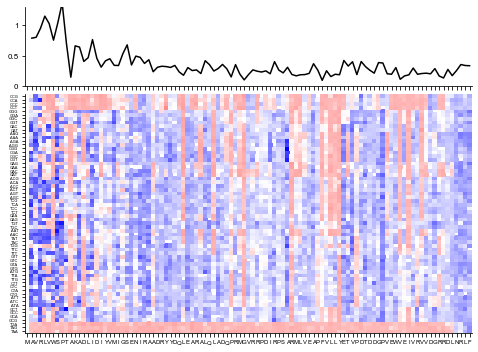

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102])


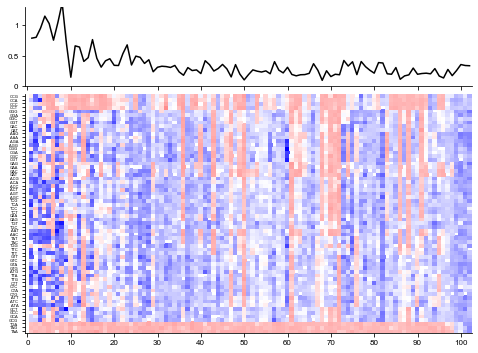

In [82]:
# get rid of weird 0 and last stop codon rows
df_old = df_old_mcs.loc[~df_old_mcs.aa_pos.isin([0,103])]
# add a row ffor M0
df_old2 = deepcopy(df_old)
cols_keep = ['aa_pos', 'lrr', 'mut_aa', 'wt_aa', 'mutkey', 'codon_mut']
df_old2 = df_old2[cols_keep]
new_r = dict(zip(cols_keep,[0,np.nan, 'M', 'M', 'M0M', 'ATG'] ))
df_old2 = df_old2.append(new_r, ignore_index=True)
plot_codons(df_old2, fout =plot_out + 'old_mcs_data_text', var_plot = 'lrr')
plot_codons(df_old2, fout =plot_out + 'old_mcs_data_number', var_plot = 'lrr', plot_number_ticks = True)